# Summary

The dataset was provided by Tredence. It has 
42,748 rows and 14 columns.

This is a multi class classifictaion problem.
The problem stated is a hypothetical one where an exoplanet with varying seasons has been discovered and a part of the data collected, of fruits growing in different weather conditions has got corrupted.

The aim is to identify the type of climate the exoplanet has based on the properties of the fruit with the existing challenge of missing data.


---



## Dataset Info:

Columns: 

    ‘edible-poisonous’, 'cap-diameter', 
    'cap-shape', 'cap-color', 
    'does-bruise-or-bleed', 'gill-attachment', 
    'gill-color', 'stem-height', 'stem-width', 
    'stem-color', 'has-ring', 'ring-type', 
    'habitat', 'season'


Independent Variables

    edible-poisonous: edible=e, poisonous=p
    cap-diameter: float number in cm
    cap-shape: bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
    cap-color: brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
    does-bruise-bleed: bruises-or-bleeding=t,no=f
    gill-attachment: adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f
    gill-color: see cap-color + none=f
    stem-height: float number in cm
    stem-width: float number in mm
    stem-color: see cap-color + none=f
    has-ring: ring=t, none=f
    ring-type: cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f
    habitat: grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d

Dependent variable

    season: spring=s, summer=u, autumn=a, winter=w

In [25]:
# Load Necessary Libraries

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

import seaborn as sns
import matplotlib.pyplot as plt

seed = 123

In [20]:
# Get parent directory (One level up)
path_parent = os.path.dirname(os.getcwd())
# Join path name as parent directory and file name
path_file = os.path.join(path_parent, 'train.csv')

In [28]:
df = pd.read_csv(path_file, sep = ',')

In [29]:
df.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


# Check Data Integrity and Basic Univariate Statistics

In [4]:
df.describe(include = 'object')

,edible-poisonous,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season
count,42748,42748,42748,42748,35808,42748,42748,42748,41029,42748,42748
unique,2,7,12,2,7,12,13,2,8,8,4
top,p,x,n,f,a,w,w,f,f,d,a
freq,23707,18884,16940,35335,8874,12930,16014,32138,33864,30934,21103


In [5]:
df.describe()

,cap-diameter,stem-height,stem-width
count,42748.000000,42748.000000,42748.000000
mean,6.712018,6.580449,12.133964
std,5.203768,3.368385,10.058929
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.190000
50%,5.840000,5.950000,10.140000
75%,8.540000,7.740000,16.530000
max,62.340000,33.920000,103.910000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


We can save columns names and also further subdivision of columns - numeric, binary and categorical(more than 2) as variables

In [7]:
features = ['edible-poisonous', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat']

In [8]:
num_col = df.select_dtypes('float64').columns.values

In [9]:
bin_col = df[features].loc[:, df[features].nunique() == 2].columns.values

In [10]:
cat_col = df[features].loc[:, df[features].nunique().between(3,15)].columns.values

# Splitting the Data

Before splitting the data into train - test sets we will checking distribution of response variable

In [11]:
df['season'].value_counts(normalize = True)

a    0.493661
u    0.375573
w    0.086507
s    0.044259
Name: season, dtype: float64

We notice the outcome variable is heavily unbalanced and thus will split it using stratified shuffle split

In [12]:
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, 
                                          test_size = 0.3, 
                                          random_state = seed)

train_idx, test_idx = next(strat_shuf_split.split(df[features], df.season))

# Create the dataframes
X_train = df.loc[train_idx, features]
y_train = df.loc[train_idx, 'season']

X_test  = df.loc[test_idx, features]
y_test  = df.loc[test_idx, 'season']

len(X_train), len(X_test)

(29923, 12825)

In [13]:
# Joining explanatory and outcome data to make it easier for us to perform EDA

Xy_train = pd.concat([X_train, y_train], axis = 1)
Xy_test = pd.concat([X_test, y_test], axis =1)

Xy_train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
25022,e,7.86,x,w,f,d,w,3.74,11.49,w,f,f,g,a
38086,e,4.10,x,n,f,p,n,7.48,12.21,e,f,f,d,a
2272,p,2.28,c,y,f,NaN,y,8.57,3.39,y,f,f,g,u
15229,e,5.12,f,n,f,a,y,7.60,5.24,o,f,f,d,w
3038,e,1.27,x,y,f,a,w,5.62,2.01,y,f,f,d,a


-------------------

#  Checking Missing Values

In [14]:
Xy_train.isnull().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         4877
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1238
habitat                    0
season                     0
dtype: int64

Percentage of missing values

In [15]:
round((Xy_train['gill-attachment'].isnull().sum() / Xy_train.shape[0]) * 100)

16

In [16]:
round((Xy_train['ring-type'].isnull().sum() / Xy_train.shape[0]) * 100)

4

The missing values are of categorical type and the precentage of missing values isn't extremely high.

There are several methods to fix missing values
Here we will be replacing missing values with a new category type 'miss' and also add an additional binary column to the corresponding column to indicate missing values

Note: Another way of tackling missing values is to make use of a supervised classifcation M/L model and predict those values. Although, this method might be more efficient, it is also more computer expensive.


In [17]:
Xy_train['miss_gill'] = Xy_train['gill-attachment'].fillna(0)

In [18]:
Xy_train['miss_ring'] = Xy_train['ring-type'].fillna(0)

In [19]:
Xy_train['miss_gill'].where(Xy_train['miss_gill'] == 0, 1, inplace = True)

In [20]:
Xy_train['miss_ring'].where(Xy_train['miss_ring'] == 0, 1, inplace = True)

In [21]:
Xy_train = Xy_train.fillna('miss')

In [22]:
Xy_train.isnull().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
miss_gill               0
miss_ring               0
dtype: int64

In [23]:
Xy_train.dtypes

edible-poisonous         object
cap-diameter            float64
cap-shape                object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
miss_gill                 int64
miss_ring                 int64
dtype: object

-------------------

# Exploratory Data Analysis

### Skewness and Outiers

We will use histogram and boxplots to check the distribution of the variables and outliers

In [24]:
sns.set(font_scale=1)
sns.set_context("talk")
sns.set_style("whitegrid")

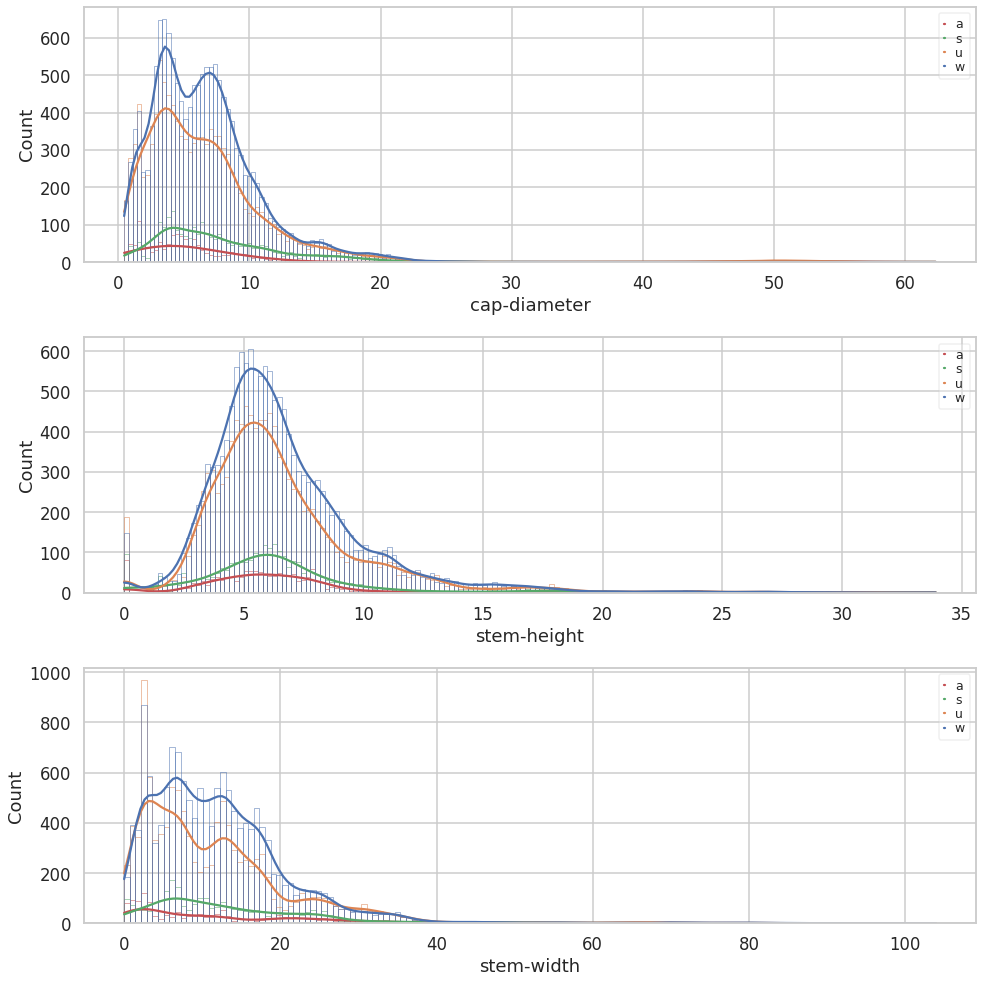

In [25]:
def histogram_eda(data):
    fig, ax = plt.subplots(3, 1, figsize=(14, 14))
    ax = ax.flatten()

    labels = ["a", "s", "u", "w"]
    for ax,feature in zip(ax, num_col):
        ax = sns.histplot(x = feature, ax = ax, hue = 'season', kde = True, fill = False, data = data,
                          legend = False)
        ax.legend(labels = labels,loc = "upper right", framealpha = 0.3, fontsize = 'x-small', 
                  handlelength = 0.1, labelspacing = 0.1)

    plt.tight_layout()
            
histogram_eda(Xy_train)

* Cap-diameter and Stem-width both seems to have right tail distribution

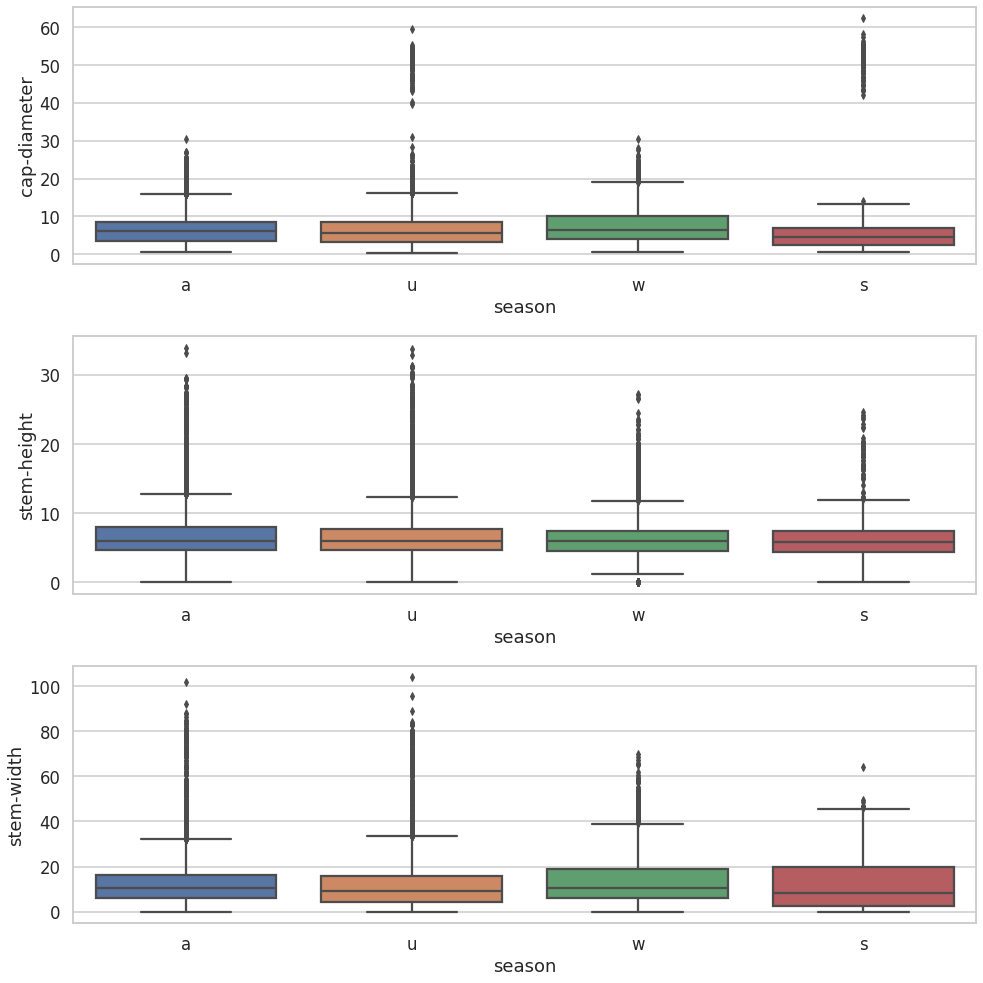

In [26]:
def boxplots_eda(data):
    fig, ax = plt.subplots(3, 1, figsize=(14, 14))
    ax = ax.flatten()
    
    labels = ["a", "s", "u", "w"]
    for ax,feature in zip(ax,num_col):
        ax = sns.boxplot(ax=ax, x='season', y=feature, data = data)
        plt.tight_layout()
                
boxplots_eda(Xy_train)

We notice a lot of outliers across all numeric columns with respect to different seasons

In [27]:
df.groupby(by = 'season').apply(pd.DataFrame.kurt, numeric_only = True)

,cap-diameter,stem-height,stem-width
season,,,
a,1.840834,7.401062,11.138233
s,12.005886,7.676801,0.269495
u,27.426927,8.464368,9.501876
w,1.180545,5.222309,3.385730


Kurtosis greater than 3 indicates heavier tails than normal distribution, hence an indication of more outliers

Note: We can perform transformations to make our data more normal (Also, they can help in fixing of outliers) as they are important for Logistic, Knn models etc. However, here we will demonstrating use of tree based algorithms and thus it isn't necessary to do the same for them.

-------------------

# Encoding

Before we can feed our input and output to the model it needs to be encoded to numeric type.

We will use 'Label Encoder' for outcome variable, 'Ordinal Encoder' for binary variables and 'CatBoostEncoder' for explanatory variables with alphabetical order (more than 2 categories

* Note 1: We can use one hot encoding inplace of target/mean encoding. However, high cardinality affects tree based algorithms and thus target/mean encoding is the preferred method.

* Note 2: Instead of 'Ordinal Encoder' for binary variables, we can also manually encode using numpy replace or choice.

Label Encoding - Ouput Categorical Variable

In [28]:
from sklearn import preprocessing

In [29]:
le = preprocessing.LabelEncoder()
le.fit(Xy_train['season'])

LabelEncoder()

In [30]:
Xy_train['season'] = le.transform(Xy_train['season'])

Ordinal Encoding - Input Binary Variables

In [31]:
oe = preprocessing.OrdinalEncoder()
oe.fit(Xy_train[bin_col])

OrdinalEncoder()

In [32]:
oe.categories_

[array(['e', 'p'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object)]

In [33]:
Xy_train[bin_col] = oe.transform(Xy_train[bin_col]).astype(int)

Category Encoder - Input Categorical Variables

In [34]:
! pip install category_encoders 

In [35]:
import category_encoders as ce 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
#count encoder 
cat_encoder = ce.CatBoostEncoder(cols = cat_col)
cat_encoder.fit(Xy_train[cat_col], y = Xy_train['season'])

CatBoostEncoder(cols=['cap-shape', 'cap-color', 'gill-attachment', 'gill-color',
                      'stem-color', 'ring-type', 'habitat'])

In [37]:
Xy_train = Xy_train.join(cat_encoder.transform(Xy_train[cat_col]).add_suffix('_count'))

In [38]:
Xy_train.drop(columns = cat_col, inplace = True)

In [39]:
Xy_train.dtypes

edible-poisonous           int64
cap-diameter             float64
does-bruise-or-bleed       int64
stem-height              float64
stem-width               float64
has-ring                   int64
season                     int64
miss_gill                  int64
miss_ring                  int64
cap-shape_count          float64
cap-color_count          float64
gill-attachment_count    float64
gill-color_count         float64
stem-color_count         float64
ring-type_count          float64
habitat_count            float64
dtype: object

----------

# Transforming Test Data

Once train data set is prepared we can do the same steps with test data set.

Note: We should set up a pipeline to perform the necessary operations thus making it easier when we will be deploying our model. 

Test Data - Missing Value Treatment

In [40]:
Xy_test['miss_gill'] = Xy_test['gill-attachment'].fillna(0)

In [41]:
Xy_test['miss_ring'] = Xy_test['ring-type'].fillna(0)

In [42]:
Xy_test['miss_gill'].where(Xy_test['miss_gill'] == 0, 1, inplace = True)

In [43]:
Xy_test['miss_ring'].where(Xy_test['miss_ring'] == 0, 1, inplace = True)

In [44]:
Xy_test = Xy_test.fillna('miss')

Test Data - Encoding Variables

In [45]:
Xy_test['season'] = le.transform(Xy_test['season'])

In [46]:
Xy_test[bin_col] = oe.transform(Xy_test[bin_col]).astype(int)

In [47]:
Xy_test = Xy_test.join(cat_encoder.transform(Xy_test[cat_col]).add_suffix('_count'))

In [48]:
Xy_test.drop(columns = cat_col, inplace = True)

In [49]:
Xy_test.dtypes

edible-poisonous           int64
cap-diameter             float64
does-bruise-or-bleed       int64
stem-height              float64
stem-width               float64
has-ring                   int64
season                     int64
miss_gill                  int64
miss_ring                  int64
cap-shape_count          float64
cap-color_count          float64
gill-attachment_count    float64
gill-color_count         float64
stem-color_count         float64
ring-type_count          float64
habitat_count            float64
dtype: object

# Saving Train and Test Data

Once data wrangling is finished, we will save our train and test datasets and perform modelling separately. 

In [50]:
## Saving after data wrangling, EDA and preprocessing of data.

outputfile_1 = 'season_train.csv'
outputfile_2 = 'season_test.csv'
Xy_train.to_csv(outputfile_1, index = False)
Xy_test.to_csv(outputfile_2, index = False)